In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from func import *
import jieba
import re
import os
# re -> \d for number, \s for any space (\t\r\n...)

In [2]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
from PIL import Image

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import itertools as it

import jieba
import re
import numpy as np
from PIL import Image
from func import *

#### 讀取資料夾中的資料

In [4]:
path = 'C:/Users/User/Desktop/python playground/week5/second.txt'
title, data = readdir(path, 0.6)


Number of files : 1


#### 顯示部份資料內容

In [5]:
for i in range(len(data)):
    print('----Document : {0}----'.format(title[i]))
    print(data[i][:50], '...', data[i][-50:-1], sep='\n', end='\n\n')

----Document : second----
2016/2/25~2016/3/25
1.	鴻夏戀一波三折 回顧4年全紀錄
日本媒體報導，夏普
...
清一些細節」。

此外，鴻海收購夏普這一方案還需得到夏普股東的批准，會否節外生枝，拭目以待。



#### 新增詞彙至自定義詞庫，並匯入該詞庫

In [6]:
jieba.load_userdict('./dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.796 seconds.
Prefix dict has been built succesfully.


#### 顯示部分資料內容

#### 新增詞彙至自定義詞庫，並匯入該詞庫

In [7]:
jieba.load_userdict('./dict.txt')

In [22]:
stopwords= ['一','二','三','四','五','六','用','淨','利','值','但','中','可','他','我','列','將','對','之','率','已','由','佔','本','日','月','年','另','故','於','較','請','再','經','也','在','依','到','等','或','大','認列','為','按','比','仍','係','後','及與','以','時','該','的','並','更','註','有','事','來','不','從','堺','從','卻','說','要','才','其','長','了','百','億','元','例如','可能','由於','因此',
             '和','與','是','約','就是','只是','但是','如果','附註','部分','事項','各位','品牌','集團','幅度','資產','新','台幣','日圓','億日圓','機構','面板','日元','企業','報導','媒體','目前','提案','經營','實地','大阪','億元','以及','代工','一步','第二','雙方','方案','分析','接受','成為','事業','目前','高橋','董事','營業','受到','提供','使用','本年','說明','現金','成本','營業外','收入','結轉','分攤','其他','影響財務','詳合','結果',
       '日本','工廠','預測','如下','之一','附註','附','註','其中','因為','查核','報告增加','會計','相對','仟元','金額','權益','能力利益','股東','合理性','假設','無形','上','開關鍵','模型','支出','控制','計算','資金評估','報告','因應','仟元','金額','權益','假設','無形','上','模型','支出','控制','計算資金','評估','人次','重大','資訊','總額','民國','估計','一副','公司','年度','包括','正確性','正','確性','減損','共為','預估','預算',
       '維持','公開','整體','表示','特性','市場','科目','發生','年本','重要','判斷','主要','流量','意見','關鍵','同期','評價','正確','地區','總資產','執行','程序','測試','稅後淨利','股份有限公司','蘋果','鴻海','夏普','郭台銘','鴻夏戀','iPhone','1','2','3','4','5','6','7','8','9','0','NT']
puncs_Full = '！？｡＂＃＄％＆＇（）()＊＋，－／：；＜＝＞＠［＼］$＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
puncs_Half = "!?.#$%&'()*+,-/:;<=>@[]^_{}|~\\\""
savetofile('./stopword.txt', [stopwords])

UnicodeEncodeError: 'cp950' codec can't encode character '\u583a' in position 0: illegal multibyte sequence

In [23]:
stopword = readdir('./stopword.txt')[1][0].split('\n')


Number of files : 1


#### 利用 jieba 對文件進行斷字，並統計字詞頻率，顯示前十名資料

In [9]:
wordDictionary = []
for i in range(len(data)):
    seg_list = jieba.cut(data[i], cut_all=False)
    seg_list = list(seg_list)
    wordDict = {}
    for w in seg_list:
        if (w not in stopword) and (w not in puncs_Full) and (w not in puncs_Half):
            if w in wordDict:
                wordDict[w] = wordDict[w] + 1
            else:
                wordDict[w] = 1
    wordDictionary.append(wordDict)
    print('Number of word in document ({0}) : '.format(title[i]), len(wordDict))
    sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
    print(sort[0:10])
    data[i] = ' '.join(jieba.cut(data[i], cut_all=False))

Number of word in document (second) :  3143
[('\r\n', 501), (' ', 148), ('技術', 51), ('OLED', 45), ('鴻', 40), ('併', 36), ('負債', 35), ('指出', 29), ('會', 28), ('三星', 28)]


#### 顯示各文件低於閥值 (limit) 的字詞

In [10]:
limit = 50
wordsperdocument = 50
for i in range(len(data)):
    count = 0
    print('----Document : {0}----'.format(title[i]))
    for ind, value in wordDictionary[0].items():
        if (value <= limit) & (count != wordsperdocument):
            count += 1
            print(ind, end = ', ')
    print()

----Document : second----
2016, 25, 	, 一波三折, 回顧, 全紀錄, Sharp, 提出, 重整, 高達, 7000, 回顧鴻夏戀, 過程, 一波, 多折, 鴻海過, 去, 努力, 期待, 開花, 經濟, 新聞, 今天上午, 召開, 臨時, 會, 決定, 夏普將, 成為鴻海, 旗下, 子公司, 規模, 達, 回顧鴻海, 夏, 普之間, 戀情, 高潮迭起, 充滿, 戲劇, 張力, 不僅, 合作, 溝通, 協商, 角力, 沉潛, 喊話, 若, 消息, 


#### 利用 wordDictionary 移除只出現一次的字詞，並顯示部份結果

In [11]:
for i in range(len(data)):
    for key, value in wordDictionary[0].items():
        if value <= limit:
            data[i] = data[i].replace(key, '')
    print('document :', title[i])
    print(data[i][:50], '...', data[i][-50:-1], sep='', end='\n\n')

document : second
 / 2 /  ~  / 3 /  
 1 .       4 年  
 日本 媒體  ，  （... 澄   」 。 
 
  ，   一 方  到  股 的  ， 否 節  ， 拭目以 。 



#### 移除所有標點符號、非中文英文數字之資料

In [12]:
for i in range(len(data)):
    data[i] = re.sub('[^\u4e00-\u9fff ]', '', data[i])
#[^\u4e00-\u9fff A-Za-z0-9]

#### 印出部份斷字結果

In [13]:
for i in range(len(data)):
    print('document :', title[i])
    print(data[i][:20], ' ... ', data[i][-20:-1], sep='', end='\n\n')

document : second
                     ... 到  股 的   否 節   拭目以 



#### 初始化 TFIDF 物件

In [14]:
tfidf_vectorizer = TfidfVectorizer(min_df=0.3, analyzer = 'word', stop_words = stopword)
#tfidf_vectorizer = CountVectorizer(stop_words = stopword)

#### 顯示初始化時輸入的停止詞彙

In [15]:
print(tfidf_vectorizer.get_stop_words())

frozenset({'在', '因為', '率', '無形', '本', '整體', '關鍵', '用', '由', '有', '模型', '已', '及與', '目前', '共為', '流量', '9', '面板', '資金評估', '工廠', '正確性', '人次', '鴻海', '百', '預估', '事業', '於', '年度', '特性', '資產', '報導', '其', '上', '重大', '二', '億日圓', '如下', '民國', '蘋果', '年', '經', '判斷', '影響財務', '大', '和', '為', '再', '7', '等', '日圓', '計算', '執行', '2', '雙方', '詳合', '億', '中', '結果', '因此', '了', '一步', 'NT', '評估', '仍', '夏普', '正確', '億元', '控制', '市場', '董事', '0', '能力利益', '3', '淨', '代工', '本年', '包括', '權益', '他', '分攤', '以及', '約', '第二', 'iPhone', '與', '之', '金額', '就是', '四', '日本', '依', '比', '事', '合理性', '5', '稅後淨利', '只是', '分析', '同期', '一副', '提案', '我', '可能', '經營', '資訊', '月', '請', '按', '企業', '是', '可', '確性', '係', '其他', '因應', '列', '堺', '公開', '股份有限公司', '將', '長', '由於', '幅度', '假設', '日元', '六', '說明', '台幣', '相對', '營業外', '發生', '4', '股東', '的', '6', '郭台銘', '後', '才', '估計', '故', '五', '更', '現金', '卻', '報告增加', '日', '成為', '接受', '品牌', '使用', '結轉', '大阪', '較', '開關鍵', '例如', '鴻夏戀', '媒體', '提供', '認列', '時', '來', '各位', '總額', '維持', '正', '程序', '受到', '測試', '佔', '成本', '收入', '如果

#### 計算 TFIDF 詞頻矩陣

In [16]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

#### 顯示詞頻矩陣大小

In [17]:
tfidf_matrix.shape

(1, 113)

#### 顯示部份詞頻矩陣中的字詞

In [18]:
words = tfidf_vectorizer.get_feature_names()
print(words[0:50])

['一二', '一塊', '一子', '一支', '三大', '三幣', '三種', '不乎', '不加', '不太', '不棄', '不消', '之列', '之霸', '二來', '二日', '二體', '任堂', '企價', '企圖', '來並', '來實', '僅比', '元化', '兩千圓', '兩大', '再拉', '協助', '協定', '原期', '可性', '同可', '和準', '和謂', '四千', '四千百', '四季', '夢寐', '大卸塊', '大舉', '太陽', '奧援', '始料', '媽媽', '孫正面', '官橋', '定之', '將於', '將立', '將透']


In [19]:
for i in range(len(data)):
    print('----Document : {0}----'.format(title[i]))
    for j in range(len(words)):
        if tfidf_matrix[i,j] > 0.2:
              print(words[j], tfidf_matrix[i,j])

----Document : second----
二體 0.4008918628686366
太陽 0.2672612419124244
日後 0.2004459314343183
次世 0.2672612419124244
負責 0.2004459314343183


In [20]:
dist = cosine_similarity(tfidf_matrix)
print(dist)

[[1.]]


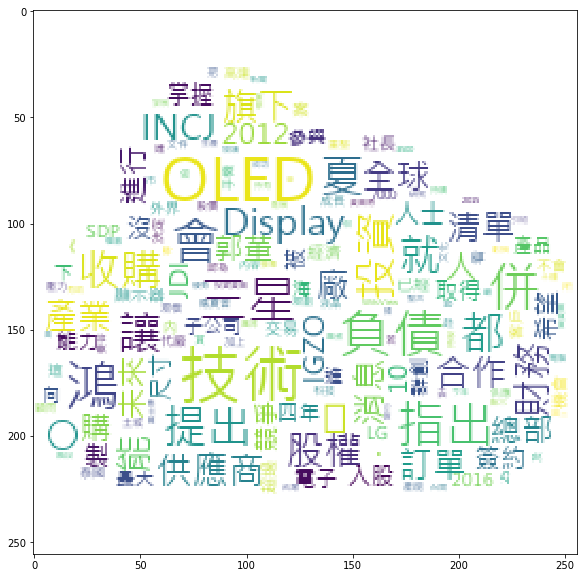

In [21]:
font = r"C:\Windows\Fonts\Microsoft JhengHei UI\msjh.ttc"
alice_mask = np.array(Image.open("week4/cloudy.png"))
wordcloud = WordCloud(font_path=font,background_color="white", mask=alice_mask)
wordcloud.fit_words(wordDict)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.savefig("week5/first.png")